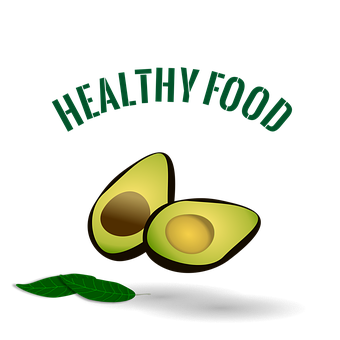

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('avocado.csv')

In [3]:
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

###### Initial thoughts:

- Drop the 'Unnamed' column because it's an index and we already have one from pandas (the column to the left of the 'unnamed' column
- What do the columns '4046', '4225', and '4770' represent? 
- Can we get rid of the decimals for some of the columns? For example - "Total Volume" - I think it would be easier to look at and work with integers as opposed to floats.

In [4]:
df.shape

(18249, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


The data set contains a total of 18249 rows and 14 columns. 

Luckily, we don't have any missing data! 

<div>
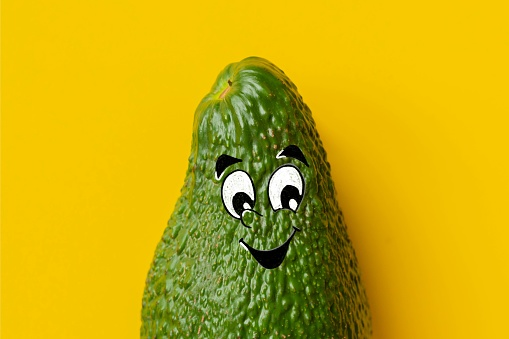
</div>

### Let's drop the 'unnamed' column. 

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True) 

In [7]:
# Quick sanity check to make sure the column was dropped
df.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

### Let's take a look at what the columns '4046', '4225', and '4770' represent.

A quick google search revealed that '4046', '4225', and '4770' are a way to dinstinguish between avocado size.

[Link to source.](https://loveonetoday.com/how-to/identify-hass-avocados/)

- 4046, Small/Medium Hass Avocado (3-5oz avocado)
- 4225, Large Hass Avocado (8-10oz avocado)
- 4770, Extra Large Hass Avocado (10-15oz avocado)

Based on this information, I'll update the column names to make it easier to work with and understand the data. 



In [8]:
df.rename(columns={'4046': 'Small/Medium Avocado', '4225': 'Large Avocado', '4770': 'Extra Large Avocado'}, inplace=True)
df.head(2)

Date  AveragePrice  Total Volume  Small/Medium Avocado  \
0  2015-12-27          1.33      64236.62               1036.74   
1  2015-12-20          1.35      54876.98                674.28   

   Large Avocado  Extra Large Avocado  Total Bags  Small Bags  Large Bags  \
0       54454.85                48.16     8696.87     8603.62       93.25   
1       44638.81                58.33     9505.56     9408.07       97.49   

   XLarge Bags          type  year  region  
0          0.0  conventional  2015  Albany  
1          0.0  conventional  2015  Albany

### Convert integers to floats

In [9]:
to_convert = ['Total Volume', 
              'Small/Medium Avocado', 
              'Large Avocado', 
              'Extra Large Avocado', 
              'Total Bags', 
              'Small Bags', 
              'Large Bags', 
              'XLarge Bags']

In [10]:
for i in to_convert:
    df[i] = df[i].astype('int64')

In [11]:
# Make sure the columns were converted to int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  18249 non-null  object 
 1   AveragePrice          18249 non-null  float64
 2   Total Volume          18249 non-null  int64  
 3   Small/Medium Avocado  18249 non-null  int64  
 4   Large Avocado         18249 non-null  int64  
 5   Extra Large Avocado   18249 non-null  int64  
 6   Total Bags            18249 non-null  int64  
 7   Small Bags            18249 non-null  int64  
 8   Large Bags            18249 non-null  int64  
 9   XLarge Bags           18249 non-null  int64  
 10  type                  18249 non-null  object 
 11  year                  18249 non-null  int64  
 12  region                18249 non-null  object 
dtypes: float64(1), int64(9), object(3)
memory usage: 1.8+ MB


### Convert 'Date' column to Pandas date time format


In [12]:
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
df.head()

Date  AveragePrice  Total Volume  Small/Medium Avocado  Large Avocado  \
0 2015-12-27          1.33         64236                  1036          54454   
1 2015-12-20          1.35         54876                   674          44638   
2 2015-12-13          0.93        118220                   794         109149   
3 2015-12-06          1.08         78992                  1132          71976   
4 2015-11-29          1.28         51039                   941          43838   

   Extra Large Avocado  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0                   48        8696        8603          93            0   
1                   58        9505        9408          97            0   
2                  130        8145        8042         103            0   
3                   72        5811        5677         133            0   
4                   75        6183        5986         197            0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany  
2  conventional  2015  Albany  
3  conventional  2015  Albany  
4  conventional  2015  Albany

In [14]:
# Confirm the 'Date' column was updated
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  18249 non-null  datetime64[ns]
 1   AveragePrice          18249 non-null  float64       
 2   Total Volume          18249 non-null  int64         
 3   Small/Medium Avocado  18249 non-null  int64         
 4   Large Avocado         18249 non-null  int64         
 5   Extra Large Avocado   18249 non-null  int64         
 6   Total Bags            18249 non-null  int64         
 7   Small Bags            18249 non-null  int64         
 8   Large Bags            18249 non-null  int64         
 9   XLarge Bags           18249 non-null  int64         
 10  type                  18249 non-null  object        
 11  year                  18249 non-null  int64         
 12  region                18249 non-null  object        
dtypes: datetime64[ns

### Now we can start exploring and visualizing our data

In [15]:
# Check how many years of data we're working with
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [16]:
df.head(5)

Date  AveragePrice  Total Volume  Small/Medium Avocado  Large Avocado  \
0 2015-12-27          1.33         64236                  1036          54454   
1 2015-12-20          1.35         54876                   674          44638   
2 2015-12-13          0.93        118220                   794         109149   
3 2015-12-06          1.08         78992                  1132          71976   
4 2015-11-29          1.28         51039                   941          43838   

   Extra Large Avocado  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0                   48        8696        8603          93            0   
1                   58        9505        9408          97            0   
2                  130        8145        8042         103            0   
3                   72        5811        5677         133            0   
4                   75        6183        5986         197            0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany  
2  conventional  2015  Albany  
3  conventional  2015  Albany  
4  conventional  2015  Albany

## Comparing total avocados sold from 2015-2018

In [17]:
quantity_per_year = df.groupby('year')['Total Volume'].sum().reset_index()
quantity_per_year

year  Total Volume
0  2015    4385465869
1  2016    4820887103
2  2017    4934302975
3  2018    1382737705

Seems like there is increasing demand for avocados - can we confirm that?

## Comparing total sales within the United States by year

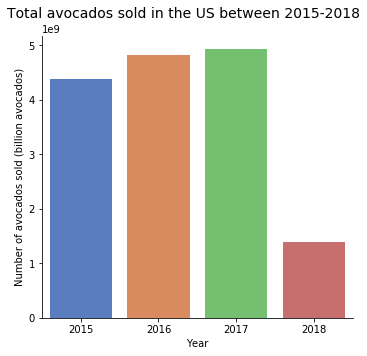

In [18]:
# Let's visualize the total number of avocados sold within the US between 2015 and 2018

sns.catplot(x="year", y='Total Volume', kind="bar", palette="muted", data=quantity_per_year, height = 5)

plt.xlabel('Year')
plt.ylabel('Number of avocados sold (billion avocados)')
plt.subplots_adjust(top=0.9)
plt.suptitle('Total avocados sold in the US between 2015-2018',  size=14)

plt.show()

Total avocado sales in the US have been on an uptrend from 2015 until 2017 according to our graph. Unfortunately, it seems like we don't have a full year worth of data for 2018. Nonetheless, we can continue exploring what we have! 

## Graphing the price distribution

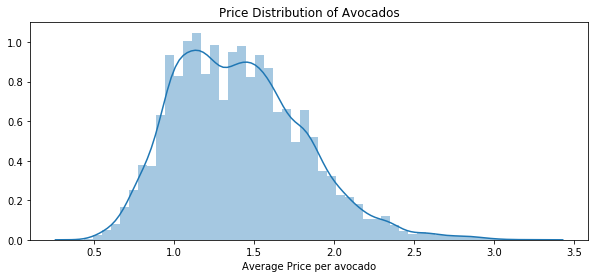

In [19]:
plt.figure(figsize=(10,4))
plt.title("Price Distribution of Avocados")
sns.distplot(df["AveragePrice"])

plt.xlabel('Average Price per avocado')
plt.show()

## Graphing avocado prices 2015-2018

First of all, we'll need to group the average price of avocados by month/year. Luckily, we can easily do this since we've already convered the 'Date' column to 'datetime64' format. 

In [20]:
grouped_by_month = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'AveragePrice':'mean'}).reset_index()
grouped_by_month.head()

Date  AveragePrice
0 2015-01-31      1.365046
1 2015-02-28      1.326944
2 2015-03-31      1.361981
3 2015-04-30      1.383449
4 2015-05-31      1.344685

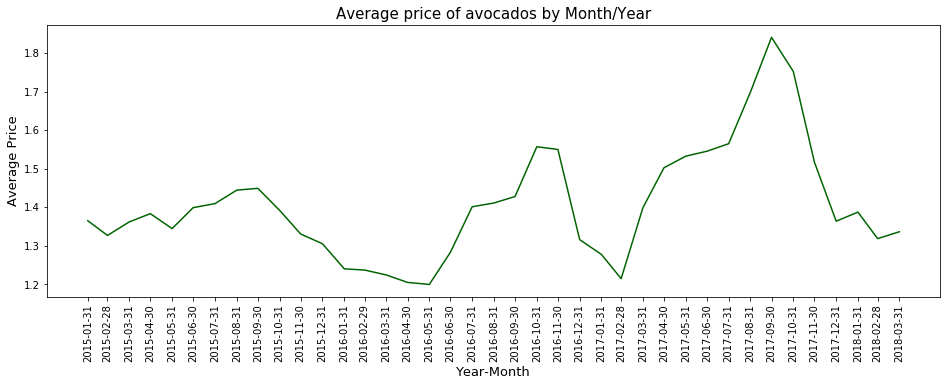

In [21]:
plt.figure(figsize=(16,5))

sns.lineplot(x='Date', y='AveragePrice', data=grouped_by_month, color='darkgreen')

plt.xticks(grouped_by_month.Date) 
plt.xticks(rotation=90)

plt.title('Average price of avocados by Month/Year', size=15)
plt.ylabel('Average Price', size=13)
plt.xlabel('Year-Month', size=13)

plt.show()

In [22]:
price_per_year = df.groupby('year')['AveragePrice'].mean().reset_index()
price_per_year

year  AveragePrice
0  2015      1.375590
1  2016      1.338640
2  2017      1.515128
3  2018      1.347531

The avocado industry suffered a major shortage in 2017 due to a low harvest. The low supply, combined with rapdily growing demand shot up the price of avocados in 2017, which is portrayed by the linegraph as well as the table above. 

[Link](https://www.bbc.com/news/business-39768480) - One of many newsources which reported the state of the avocado industry in 2017.

Unfortunately, we only have data for the first 3 months of 2018. Let's run a comparison for avocados sold during the first 3 months in 2015-2018.

![Alt Text](https://media.giphy.com/media/3oD3YrUgucpmkZr5a8/giphy.gif) 

### Comparing total first quarter sales from 2015-2018

In [23]:
volume_3_months = df.groupby(pd.Grouper(key='Date',freq='M')).agg({'Total Volume':'sum'}).reset_index()

# Total sales during the first 3 months of 2015
first_quarter_2015 = volume_3_months.loc[volume_3_months['Date'] < '2015-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2016
first_quarter_2016 = volume_3_months.loc[volume_3_months['Date'] > '2015-12-31']
first_quarter_2016 = first_quarter_2016.loc[first_quarter_2016['Date'] < '2016-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2017
first_quarter_2017 = volume_3_months.loc[volume_3_months['Date'] > '2016-12-31']
first_quarter_2017 = first_quarter_2017.loc[first_quarter_2017['Date'] < '2017-4-01'][['Total Volume']].values.sum()

# Total sales during the first 3 months of 2018
first_quarter_2018 = volume_3_months.loc[volume_3_months['Date'] > '2017-12-31']
first_quarter_2018 = first_quarter_2018.loc[first_quarter_2018['Date'] < '2018-4-01'][['Total Volume']].values.sum()

In [24]:
# Create a series using the first quarter sales for 2015-2018

quarter_1_total = [first_quarter_2015, first_quarter_2016, first_quarter_2017, first_quarter_2018]

quarter_1_total_array = np.array([i for i in quarter_1_total])
quarter_1_total_array

first_quarter_volumes = pd.Series(quarter_1_total_array, index=['Q1 - 2015', 'Q1 - 2016', 'Q1 - 2017', 'Q1 - 2018'])
first_quarter_volumes = first_quarter_volumes.to_frame().reset_index()
# comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])
first_quarter_volumes.columns = ['Q1 Sales - Year', 'Total Avocados Sold (billion avocados)']
first_quarter_volumes


Q1 Sales - Year  Total Avocados Sold (billion avocados)
0       Q1 - 2015                              1099305192
1       Q1 - 2016                              1295263274
2       Q1 - 2017                              1363702919
3       Q1 - 2018                              1382737705

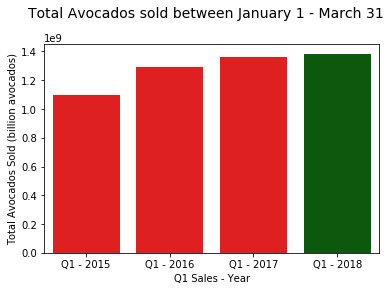

In [25]:
clrs = ['red' if (x < max(quarter_1_total)) else 'darkgreen' for x in quarter_1_total]

q1_plot = sns.barplot(x='Q1 Sales - Year', y='Total Avocados Sold (billion avocados)', data=first_quarter_volumes, palette=clrs)

plt.subplots_adjust(top=0.85)
plt.suptitle('Total Avocados sold between January 1 - March 31', size=14)

plt.show()

More avocados were sold in the first quarter of 2018 then any other first quarter from our dataset. If this trend continued than 2018 would see the highest number of sales in comparison to 2015-2017. Intuition tells us that this was probably the case, however we can't confirm that without looking at the full year data. 

[Link](https://hassavocadoboard.com/) - Updated data can be downloaded here.

## Comparing Conventional and Organic Avocados

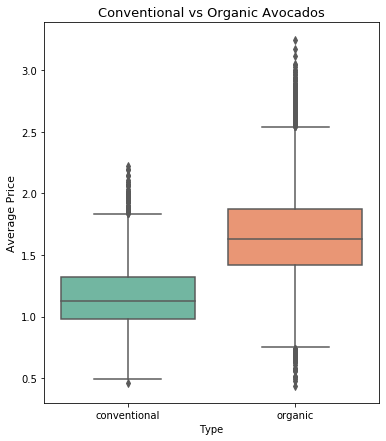

In [26]:
plt.figure(figsize=(6,7))
sns.boxplot(x='type', y='AveragePrice', palette="Set2", data=df)

plt.xlabel('Type')
plt.ylabel('Average Price', size=11)
plt.title('Conventional vs Organic Avocados', size=13)

plt.show()

We can infer that organic avocados are, on average, more expensive than conventional avocados. This data makes sense because organic food tends to be more expensive in comparison to traditional food.

## Analyze total sales by region

In [27]:
df.head(2)

Date  AveragePrice  Total Volume  Small/Medium Avocado  Large Avocado  \
0 2015-12-27          1.33         64236                  1036          54454   
1 2015-12-20          1.35         54876                   674          44638   

   Extra Large Avocado  Total Bags  Small Bags  Large Bags  XLarge Bags  \
0                   48        8696        8603          93            0   
1                   58        9505        9408          97            0   

           type  year  region  
0  conventional  2015  Albany  
1  conventional  2015  Albany

In [28]:
sales_by_region = df.groupby('region')['Total Volume'].sum().reset_index()
sales_by_region = sales_by_region.sort_values('Total Volume',ascending=False)

top_10 = sales_by_region[:11]
top_10

region  Total Volume
51       TotalUS    5864740027
52          West    1086778994
6     California    1028981489
45  SouthCentral    1011279447
29     Northeast     713280743
46     Southeast     615238242
15    GreatLakes     589642388
25      Midsouth     508349200
22    LosAngeles     507896375
35        Plains     311188370
28       NewYork     240733961

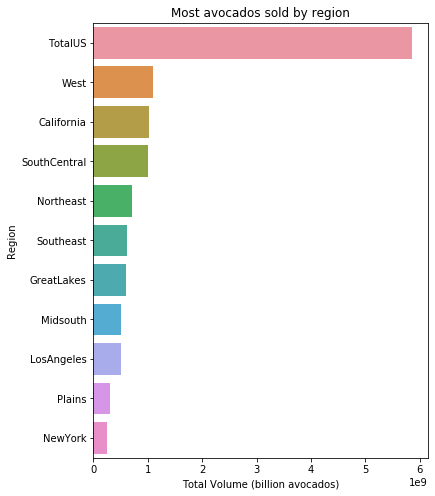

In [29]:
plt.figure(figsize=(6,8))

sns.barplot(x='Total Volume', y='region', orient='h', data=top_10 )

# Let's visualize the total number of avocados sold within the US between 2015 and 2018

plt.title('Most avocados sold by region')
plt.ylabel('Region')
plt.xlabel('Total Volume (billion avocados)')

plt.show()

There are lots of avocado fans out there!

## Consumption in the top 10 regions compared to the rest of the US

In [30]:
# How many regions are there in total? 
df.region.nunique()

54

In [31]:
# Calculating the total consumption of the top 10 regions
ten_regions_total = top_10['Total Volume'][1:].sum()
ten_regions_total

# Calculating the total consumption of the remaining regions
remaining_regions = sales_by_region[11:]
remaining_regions = remaining_regions['Total Volume'].sum()

# Inputting both in a series
comparison = np.array([ten_regions_total, remaining_regions])
comparison = pd.Series(comparison, index=['Top 10 regions', 'Rest of the US (44 regions)'])

remaining_regions
comparison

Top 10 regions                 6613369209
Rest of the US (44 regions)    3045284416
dtype: int64

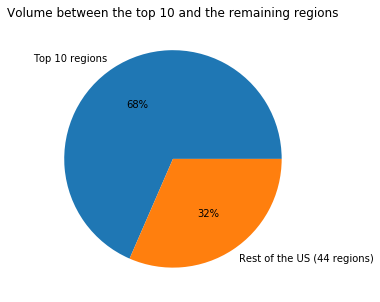

In [32]:
comparison.plot.pie(subplots=True, figsize=(10, 5), autopct='%1.0f%%')

plt.title('Volume between the top 10 and the remaining regions')
plt.ylabel('')

plt.show()

We can see that the top 10 avocado consuming regions within the United States account for approximately 68% of total consumption. The rest of the regions - 44 of them - combined only consumed 32%. 

###### There is a lot more to explore with our dataset. Some ideas for further analysis include:

- Is there a big difference in price of avocados between each region?
- What region tends to buy larger quantities (extra large bags)?
- What regions purchase more organic avocados in comparison to traditional?
- How many people live in each region in comparison to how many avocados were consumed? Is the reason for the high consumption in the top 10 regions simply a higher population, or are people living there just avocado enthusiasts?

#### I hope you found this analysis useful! 

#### Please feel free to provide any feedback or ideas that you may have.